In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import pickle as pkl

from boutdata.restart import addvar
import glob
import shutil

sys.path.append(r"/users/mjk557/scratch/scripts/sdtools")

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.casedeck import *

%load_ext autoreload
%autoreload 2

In [28]:
case_dir = r"/ssd_scratch/cases"
casepaths = dict()
cases = []
for input_file in Path(case_dir).rglob('BOUT.inp'):
    casepaths[input_file.parent.name] = input_file.parent
    cases.append(input_file.parts[-2])

In [12]:
db = CaseDB(
    case_dir = r"/ssd_scratch/cases",
    grid_dir = r"/ssd_scratch/cases"
    )


In [92]:
case = Load.case_1D(db.casepaths["hraf-c5-10"])

In [95]:
deck = CaseDeck1D(r"/ssd_scratch/cases", key = "hraf-c5", skip = "", verbose = True)


>>> All cases in path: ['6as-b25n60r1-1', '6js-b25n60-1', '6as-b20-1', '6as-d-1', '6as-b25n60r16-1', '6as-b15-1', '6jso-b25n60-1', '6hs-d-1', 'ut-500', '6as-b25-1', '6aso-b25n60-1', '6as-n60-1', '6bs-d-1', '6as-b25n60-1', '6gs-b25n60-1', '6is-b1n60-1', '6is-b10n60-1', '6iso-b25n60-1', 'ut-1000', 'uniformtest', '6is-b25n60-1', '6as-b25n60-1-cfthr', '1as-b25n60-1', '6aso-d-1', '6gso-b25n60-1', '6gs-d-1', '6as-b25n60r4-1', '6as-b25n60a0-1', 'ma1-c1-1', 'ma3-c1-4-bckup', 'ma3-c1-4', 'ma3-c2-1', 'ma2-c1-1', 'ma3-c1-1', 'ma3-c3-1', 'ma3-c4-1', 'ma1-c1-4', 'ma3-c1-2', 'ma4-c1-4', 'c', 'recycling1d-oldmaster', 'mbalancetest', 'hraf-c5-3', 'ta2-nopi', 'hrac-c5-10-fixbc', 'neut_test2', 'recycling1d', 'recycling1d_pi', 'hrac-c5-5-ftest', 'dntest', 'recycling1d-master', 'b', 'hrac-c4-5', 'hrac-c5-5', 'hraf-c5-1', 'hrac-c5-10', 'hrac-c1-5', 'ta1-fromrecycling', 'hraf-c5-2', 'hraf-c5-7', 'hrac-c1-10', 'ta3-noneutbc', 'neut_test', 'hraf-c5-10', 'a', 'hraf-c5-5', 'hrac-c3-5', 'ct1b-hitstep', 'bt8-str

In [96]:
deck.get_stats()

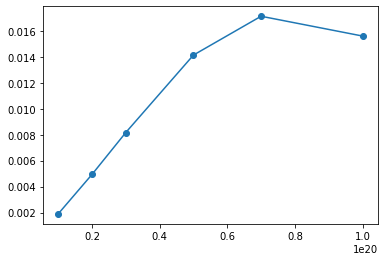

In [111]:
plt.plot(deck.stats["initial_dens"], deck.stats["target_flux"], "o-")

In [122]:
case = Load.case_1D(db.casepaths["hraf-c5-10"])

/ssd_scratch/anaconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/ssd_scratch/anaconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/ssd_scratch/anaconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/ssd_scratch/anaconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


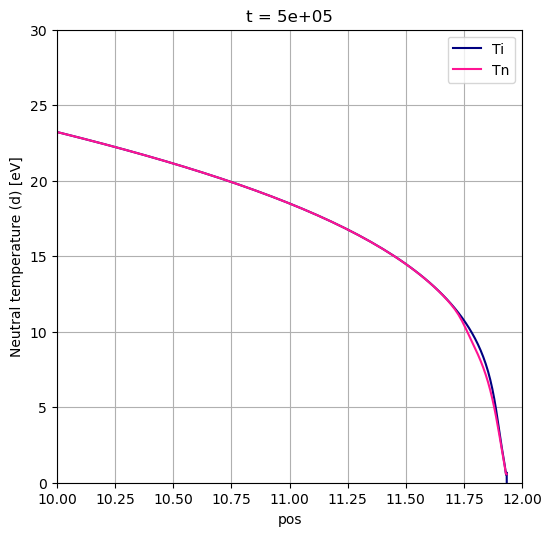

In [127]:
c = case.ds.isel(t=-1)

fig, ax = plt.subplots(figsize = (6,6), dpi = 100)

c["Td+"].plot(ax = ax, label = "Ti", color = "navy")
c["Td"].plot(ax = ax, label = "Tn", color = "deeppink")

ax.set_xlim(10,12)
ax.set_ylim(0,30)
ax.grid()
ax.legend()

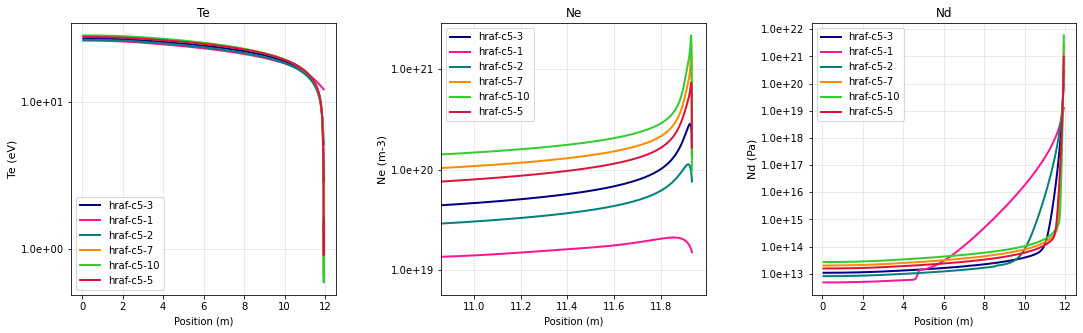

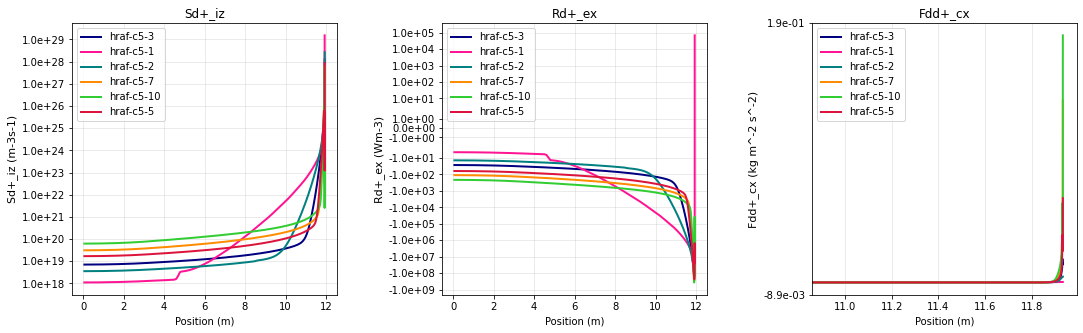

In [108]:
deck.plot()

In [105]:
case.ds.data_vars

Data variables:
    Bxy                 (pos) float64 dask.array<chunksize=(204,), meta=np.ndarray>
    Dd_Dpar             (t, pos) float64 dask.array<chunksize=(201, 204), meta=np.ndarray>
    Ed+_iz              (t, pos) float64 dask.array<chunksize=(201, 204), meta=np.ndarray>
    Ed+_rec             (t, pos) float64 dask.array<chunksize=(201, 204), meta=np.ndarray>
    Ed_Dpar             (t, pos) float64 dask.array<chunksize=(201, 204), meta=np.ndarray>
    Edd+_cx             (t, pos) float64 dask.array<chunksize=(201, 204), meta=np.ndarray>
    Fd+_iz              (t, pos) float64 dask.array<chunksize=(201, 204), meta=np.ndarray>
    Fd+_rec             (t, pos) float64 dask.array<chunksize=(201, 204), meta=np.ndarray>
    Fd_Dpar             (t, pos) float64 dask.array<chunksize=(201, 204), meta=np.ndarray>
    Fdd+_cx             (t, pos) float64 dask.array<chunksize=(201, 204), meta=np.ndarray>
    G1                  (pos) float64 dask.array<chunksize=(204,), meta=np.ndarra

In [68]:
ds = case.ds.isel(t=-1, y = slice(1,-1))
ds

<xarray.Dataset>
Dimensions:             (y: 202, pos: 204)
Coordinates:
    dx                  (y) float64 dask.array<chunksize=(202,), meta=np.ndarray>
    dy                  (y) float64 dask.array<chunksize=(202,), meta=np.ndarray>
    dz                  (y) float64 dask.array<chunksize=(202,), meta=np.ndarray>
    t                   float64 5e+05
  * y                   (y) float64 0.1791 0.2979 0.416 ... 12.17 12.17 12.17
  * pos                 (pos) float64 -0.1784 0.0 0.05937 ... 11.93 11.93 11.93
Data variables: (12/82)
    Bxy                 (y) float64 dask.array<chunksize=(202,), meta=np.ndarray>
    Dd_Dpar             (y) float64 dask.array<chunksize=(202,), meta=np.ndarray>
    Ed+_iz              (y) float64 dask.array<chunksize=(202,), meta=np.ndarray>
    Ed+_rec             (y) float64 dask.array<chunksize=(202,), meta=np.ndarray>
    Ed_Dpar             (y) float64 dask.array<chunksize=(202,), meta=np.ndarray>
    Edd+_cx             (y) float64 dask.array<chunksize=(202,), meta=np.ndarray>
    ...                  ...
    t_array             float64 dask.array<chunksize=(), meta=np.ndarray>
    ncalls              int32 dask.array<chunksize=(), meta=np.ndarray>
    ncalls_e            int32 dask.array<chunksize=(), meta=np.ndarray>
    ncalls_i            int32 dask.array<chunksize=(), meta=np.ndarray>
    da                  (y) float64 dask.array<chunksize=(202,), meta=np.ndarray>
    dV                  (y) float64 dask.array<chunksize=(202,), meta=np.ndarray>
Attributes:
    metadata:  {'BOUT_VERSION': 5.0, 'Bnorm': 1.0, 'Cs0': 97871.51425755137, ...
    options:   # 1D system with:\n#  - no-flow boundary on lower Y\n#  - shea...
    geometry:

In [34]:
deck_key = "hraf-c5"

deck_cases = [x for x in db.cases if deck_key in x]

# case.ds["NVd+"].isel(t=-1).squeeze().values[-2]
deck_cases.sort()
deck_cases

['hraf-c5-1', 'hraf-c5-10', 'hraf-c5-2', 'hraf-c5-3', 'hraf-c5-5', 'hraf-c5-7']

In [35]:
case.ds["y"]

<xarray.DataArray 'y' (y: 204)>
array([-0.17841 ,  0.      ,  0.059372, ..., 11.933702, 11.934   , 11.934304])
Coordinates:
    dx       (y) float64 dask.array<chunksize=(204,), meta=np.ndarray>
    dy       (y) float64 dask.array<chunksize=(204,), meta=np.ndarray>
    dz       (y) float64 dask.array<chunksize=(204,), meta=np.ndarray>
  * y        (y) float64 -0.1784 0.0 0.05937 0.1775 ... 11.93 11.93 11.93 11.93

KeyError: 'density_source_multiplier_d+'

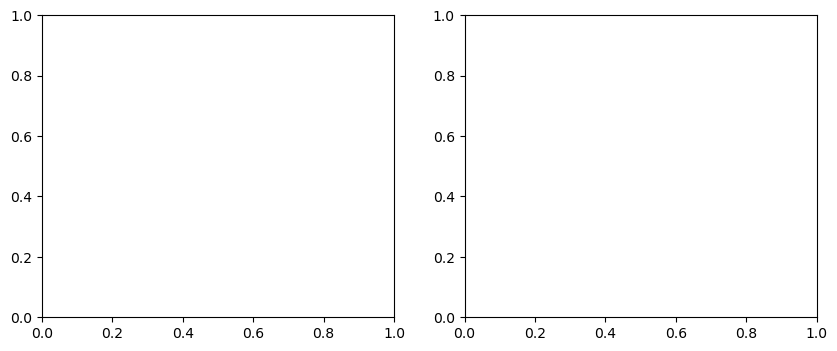

In [11]:
ds = case.ds
o = case.ds.options

fig, axes = plt.subplots(1,2, figsize=(5*2,4), dpi = 100)

upstream_dens = ds["Nd+"].isel(y=1)
# target_dens = o["d+"]["density_upstream"]
multiplier = ds["density_source_multiplier_d+"]
total_source = (ds["Sd+_src"] * ds["dV"]).sum("y")

ax = axes[0]
upstream_dens.plot(ax = ax, c = "k", label = "Upstream density")
# ax.hlines(y = target_dens, xmin = upstream_dens["t"][0], xmax = upstream_dens["t"][-1], color = "r", label = "Target")
ax.set_title("Density")
ax.legend(); ax.grid()

ax = axes[1]
multiplier.plot(ax = ax, c = "k", label = "Source multiplier")
ax.grid()


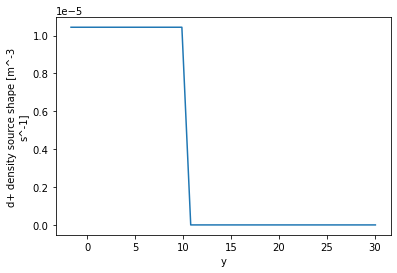

In [13]:
(self.ds["density_source_shape_d+"]).plot()

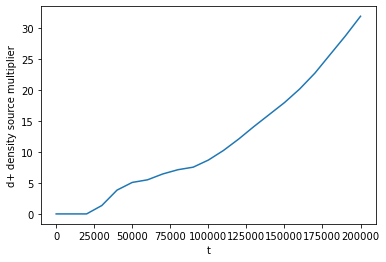

In [138]:
self.ds["density_source_multiplier_d+"].plot()

>>> System mass balance
- Total in ---------------
- Input ion source = 0.000E+00 [s-1]
- Input neutral source = 0.000E+00 [s-1]
- Ionisation source = 3.418E+21 [s-1]
- Intended recycling source = 4.766E+21 [s-1]
- Total = 3.418E+21 [s-1]

- Total out ---------------
- Sheath ion flux = 4.766E+21 [s-1]
- Sheath neutral flux = -6.622E+20 [s-1]
- Recombination source = -8.727E-08 [s-1]
- Total = 4.104E+21 [s-1]

- Difference:
---> -6.858E+20 [s-1] (-20.063%)


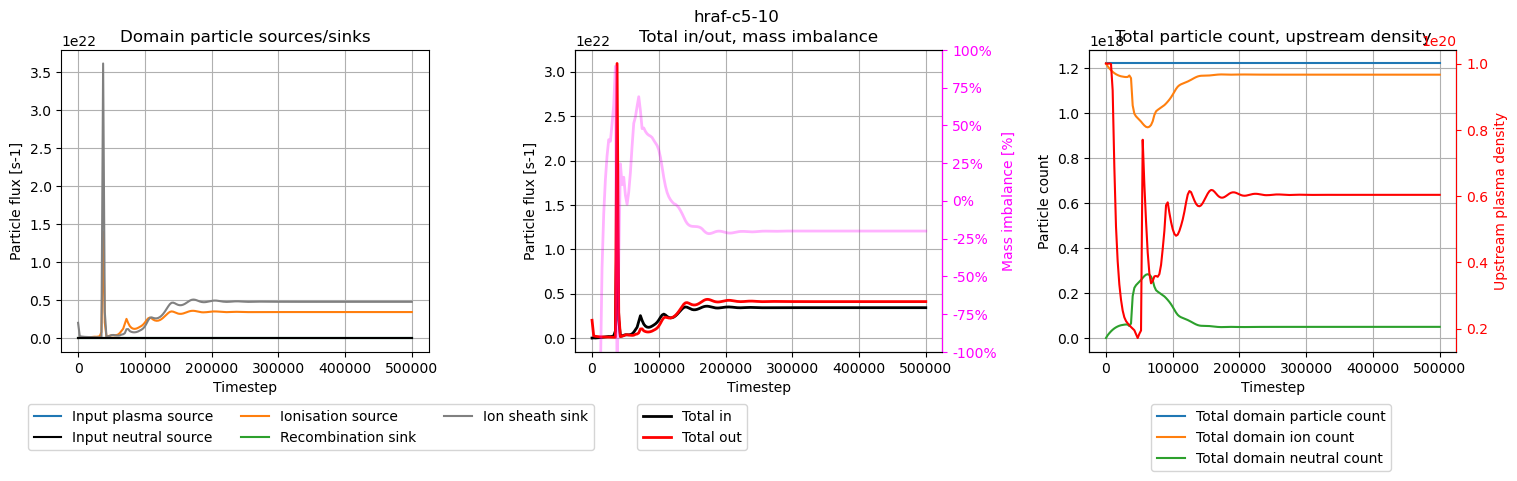

In [14]:
o = case.ds.options
ds = case.ds
meta = case.ds.metadata
MYG = meta["MYG"]
mass_i = constants("mass_p") * 2
 
# ----- Recycling
recycle_multiplier = float(o["d+"]["recycle_multiplier"])

# ----- Boundary flux
sheath_area = ds.da[-2]
sheath_ion_flux = ds["NVd+"].isel(y=-MYG) * sheath_area / mass_i
sheath_neutral_flux = ds["NVd"].isel(y=-MYG) * sheath_area / mass_i
intended_recycle_flux = sheath_ion_flux * recycle_multiplier

# ----- Domain integrals
integrals = dict()
for param in ["Sd+_src", "Sd_src", "Sd+_iz", "Sd+_rec", "SNd+", "Nd+", "Nd"]:
    if param in ds.data_vars:
        integrals[param] = (ds[param].isel(y = slice(MYG,-MYG)) * ds["dV"].isel(y = slice(MYG,-MYG))).sum("y")
    else:
        integrals[param] = np.zeros_like(sheath_ion_flux)

# ----- Total fluxes
total_in = integrals["Sd+_src"] + integrals["Sd_src"] + integrals["Sd+_iz"]
total_out = sheath_ion_flux + sheath_neutral_flux + (integrals["Sd+_rec"] * -1)
total_balance = total_in - total_out
frac_balance = total_balance / total_in
total_ions = integrals["Nd+"]
total_neutrals = integrals["Nd"]
total_particles = total_ions + total_neutrals
avg_plasma_dens = integrals["Nd+"] / ds["dV"].sum()
upstream_dens = ds["Nd+"].isel(y = MYG-1)

print(">>> System mass balance")
print("- Total in ---------------")
print(f"- Input ion source = {integrals['Sd+_src'][-1]:.3E} [s-1]")
print(f"- Input neutral source = {integrals['Sd_src'][-1]:.3E} [s-1]")
print(f"- Ionisation source = {integrals['Sd+_iz'][-1]:.3E} [s-1]")
print(f"- Intended recycling source = {intended_recycle_flux[-1]:.3E} [s-1]")
print(f"- Total = {total_in[-1]:.3E} [s-1]")
print("\n- Total out ---------------")
print(f"- Sheath ion flux = {sheath_ion_flux[-1]:.3E} [s-1]")
print(f"- Sheath neutral flux = {sheath_neutral_flux[-1]:.3E} [s-1]")
print(f"- Recombination source = {integrals['Sd+_rec'][-1]:.3E} [s-1]")
print(f"- Total = {total_out[-1]:.3E} [s-1]")
print(f"\n- Difference:")
print(f"---> {total_balance[-1]:.3E} [s-1] ({total_balance[-1]/total_in[-1]:.3%})")

fig, axes = plt.subplots(1,3, figsize=(18,4), dpi = 100)
fig.suptitle(case.name)
fig.subplots_adjust(wspace=0.4)
t = ds.coords["t"]


ax = axes[0]
ax.set_title("Domain particle sources/sinks")
ax.plot(t, integrals["Sd+_src"], label = "Input plasma source")
ax.plot(t, integrals["Sd_src"], label = "Input neutral source", c = "k", zorder = 100)
ax.plot(t, integrals["Sd+_iz"], label = "Ionisation source")
ax.plot(t, integrals["Sd+_rec"], label = "Recombination sink")
ax.plot(t, sheath_ion_flux, ls = "-", c = "grey", label = "Ion sheath sink")
ax.set_ylabel("Particle flux [s-1]")

ax = axes[1]
ax.set_title("Total in/out, mass imbalance")
ax.plot(t, total_in, lw = 2, ls = "-", c = "k", label = "Total in")
ax.plot(t, total_out, lw = 2, ls = "-", c = "r", label = "Total out")
ax.set_ylabel("Particle flux [s-1]")

ax2 = ax.twinx()
ax2.plot(t, frac_balance, lw = 2, alpha = 0.3, ls = "-", c = "magenta", label = "Imbalance")
ax2.set_ylim(-1,1)
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:.0%}"))
ax2.set_ylabel("Mass imbalance [%]", c = "magenta")
ax2.spines["right"].set_color("magenta")
ax2.yaxis.label.set_color("magenta")
ax2.tick_params(axis="y", colors = "magenta")

ax = axes[2]
ax.set_title("Total particle count, upstream density")
ax.plot(t, integrals["Nd"] + integrals["Nd+"], label = "Total domain particle count")
ax.plot(t, integrals["Nd+"], label = "Total domain ion count")
ax.plot(t, integrals["Nd"], label = "Total domain neutral count")
ax.set_ylabel("Particle count")

ax2 = ax.twinx()
ax2.plot(t, upstream_dens, c = "r", ls = "-")
ax2.set_ylabel("Upstream plasma density")
ax2.spines["right"].set_color("red")
ax2.yaxis.label.set_color("red")
ax2.tick_params(axis="y", colors = "red")

for ax in axes:
    ax.grid(which = "both")
    ax.set_xlabel("Timestep")


axes[0].legend(loc="upper left", bbox_to_anchor = (-0.11,-0.15), ncol = 3)
axes[1].legend(loc="upper left", bbox_to_anchor = (0.15,-0.15), ncol = 1)
axes[2].legend(loc="upper left", bbox_to_anchor = (0.15,-0.15), ncol = 1)

In [114]:
upstream_dens.values

array([5.00000000e+19, 5.00083619e+19, 4.98951835e+19, 4.70206572e+19,
       3.42558135e+19, 2.49527766e+19, 2.01975717e+19, 1.74400668e+19,
       1.58541404e+19, 1.49387604e+19, 1.43347859e+19, 1.39061846e+19,
       1.35099878e+19, 1.31207905e+19, 1.25338712e+19, 1.11858308e+19,
       9.84440609e+18, 1.01664865e+19, 1.19144704e+19, 3.66462384e+19,
       3.27696350e+19, 3.01387207e+19, 2.81782349e+19, 2.65377846e+19,
       2.53161956e+19, 2.45764441e+19, 2.42311306e+19, 2.42966965e+19,
       2.52174804e+19, 2.67149258e+19, 2.81950611e+19, 3.02635662e+19,
       3.24670613e+19, 3.39453634e+19, 3.32308847e+19, 3.20245740e+19,
       3.11530555e+19, 3.04793556e+19, 3.00244788e+19, 2.97885867e+19,
       2.97651210e+19, 2.99254299e+19, 3.02288860e+19, 3.06384884e+19,
       3.10838927e+19, 3.14592607e+19, 3.17067829e+19, 3.17447204e+19,
       3.15516055e+19, 3.12281242e+19, 3.09371375e+19, 3.07369341e+19,
       3.06208950e+19, 3.05815780e+19, 3.06072087e+19, 3.06835023e+19,
      

>>> System mass balance
- Total in ---------------
- Input ion source = 0.000E+00 [s-1]
- Input neutral source = 0.000E+00 [s-1]
- Ionisation source = 2.770E+21 [s-1]
- Intended recycling source = 2.770E+21 [s-1]
- Total = 2.770E+21 [s-1]

- Total out ---------------
- Sheath ion flux = 2.700E+24 [s-1]
- Sheath neutral flux = 0.000E+00 [s-1]
- Recombination source = -1.192E+19 [s-1]
- Total = 2.700E+24 [s-1]

- Difference:
---> -2.697E+24 [s-1] (-97364.397%)


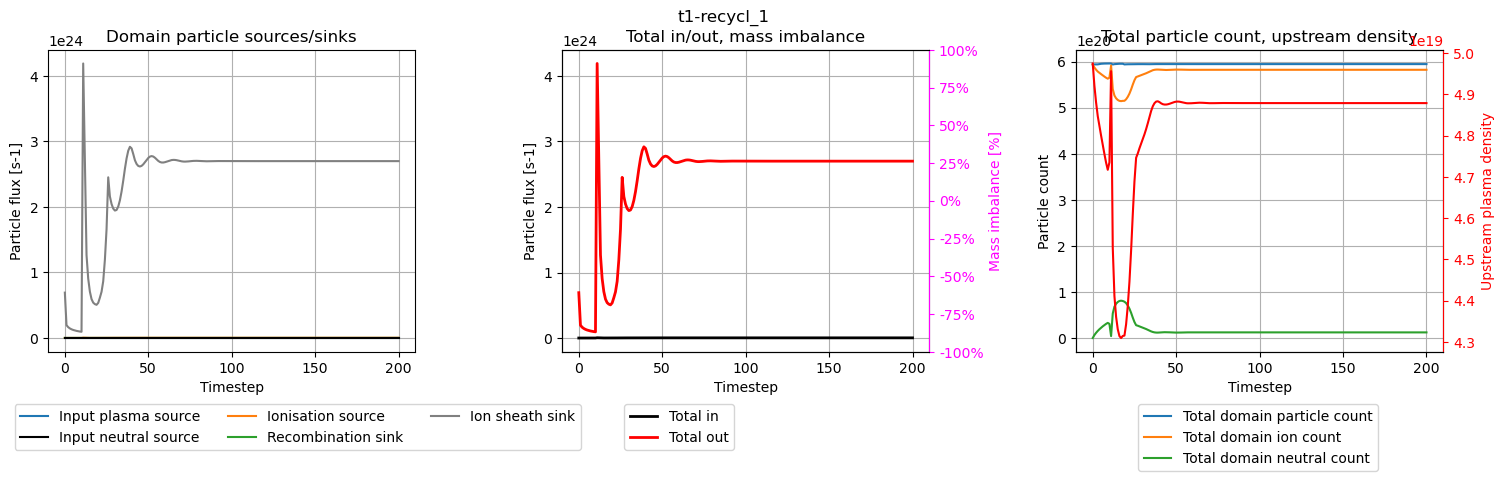

In [90]:
import analysis
analysis.Case(r"/ssd_scratch/hcases/mbtest/t1-recycl_1").mass_balance_hermes()

In [62]:
sheath_area.values

array(0.00102175)

In [50]:
self = h2D.Load.case_1D(r"/ssd_scratch/hcases/mbtest/t1-recycl_1")

ds = self.ds

# Replace inner guard cells with values at cell boundaries
# Hardcoded dimension order: t, y
# Cell order at target:
# ... | last | guard | second guard
#            ^target   ^not used
#     |  -3  |  -2   |      -1

if self.guard_replaced == False:
    for var_name in ds.data_vars:
        var = self.ds[var_name]
        
        if "y" in var.dims:
            
            if "t" in var.dims:
                print(var_name)
                var[:, -2] = (var[:,-3] + var[:,-2])/2
                var[:, 1] = (var[:, 1] + var[:, 2])/2
            else:
                var[-2] = (var[-3] + var[-2])/2
                var[1] = (var[1] + var[2])/2 
            
else:
    print("Warning: guards already replaced")
        
self.guard_replaced = True

Dd_Dpar
Ed+_iz
Ed+_rec
Ed_Dpar
Edd+_cx
Fd+_iz
Fd+_rec
Fd_Dpar
Fdd+_cx
NVd
NVd+
Nd
Nd+
Ne
Pd
Pd+
Pd+_src
Pd_src
Pe
Pe_src
Rd+_ex
Rd+_rec
SNVd
SNVd+
SNd
SNd+
SPd
SPd+
SPe
Sd+_iz
Sd+_rec
Sd+_src
Sd_Dpar
Sd_src
Td
Td+


/ssd_scratch/anaconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/ssd_scratch/anaconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/ssd_scratch/anaconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/ssd_scratch/anaconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/ssd_scratch/anaconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/ssd_scratch/anaconda3/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: inv

Te
Vd
Vd+
Ve
ddt(NVd)
ddt(NVd+)
ddt(Nd)
ddt(Nd+)
ddt(Pd)
ddt(Pd+)
ddt(Pe)
kappa_par_d+
kappa_par_e


In [49]:
var

<xarray.DataArray 'Bxy' (y: 204)>
dask.array<getitem, shape=(204,), dtype=float64, chunksize=(204,), chunktype=numpy.ndarray>
Coordinates:
    dx       (y) float64 dask.array<chunksize=(204,), meta=np.ndarray>
    dy       (y) float64 dask.array<chunksize=(204,), meta=np.ndarray>
    dz       (y) float64 dask.array<chunksize=(204,), meta=np.ndarray>
  * y        (y) float64 0.05981 0.1791 0.2979 0.416 ... 12.17 12.17 12.17 12.17
Attributes:
    cell_location:  CELL_CENTRE
    direction_y:    Standard
    direction_z:    Average
    source:         Coordinates
    metadata:       {'BOUT_VERSION': 5.0, 'Bnorm': 1.0, 'Cs0': 97871.51425755...
    options:        # 100% recycling, PI controller set on no flow\n# Selecte...
    geometry:

In [48]:
var[:,-2]

IndexError: too many indices

In [46]:
var

'Bxy'

In [37]:
var.isel(t=-1).values

array([ 0.00000000e+00,  0.00000000e+00,  2.00447357e-07,  1.38346284e-07,
        5.84956443e-08,  3.53812313e-08, -5.11540335e-08, -9.59847276e-08,
       -7.40916552e-08, -9.19841849e-09,  6.07398011e-08,  8.99731759e-08,
        6.36033737e-08, -1.50364593e-09, -6.66903948e-08, -9.15695307e-08,
       -6.53823900e-08, -2.64296932e-09,  5.93209008e-08,  8.23540006e-08,
        5.61313812e-08, -5.67790334e-09, -6.59203298e-08, -8.84385174e-08,
       -6.76182396e-08, -1.09053991e-08,  5.82904627e-08,  4.17205243e-08,
        1.56166086e-07,  1.04444317e-07, -8.61352218e-08, -7.22156453e-08,
       -7.27525710e-08, -2.93601100e-08,  3.13989995e-08,  7.24234516e-08,
        7.75483490e-08,  4.33490538e-08, -1.60330284e-08, -6.85034606e-08,
       -8.89600654e-08, -6.72144591e-08, -1.25485287e-08,  4.83199583e-08,
        8.45919622e-08,  7.83700517e-08,  2.95144101e-08, -3.86864695e-08,
       -8.51902774e-08, -8.89138246e-08, -4.98675288e-08,  1.05674760e-08,
        6.12769013e-08,  

In [31]:
var = ds["NVd+"]



var.isel(t=-1).values

array([ 0.00000000e+00, -2.00447357e-07,  2.00447357e-07,  1.38346284e-07,
        5.84956443e-08,  3.53812313e-08, -5.11540335e-08, -9.59847276e-08,
       -7.40916552e-08, -9.19841849e-09,  6.07398011e-08,  8.99731759e-08,
        6.36033737e-08, -1.50364593e-09, -6.66903948e-08, -9.15695307e-08,
       -6.53823900e-08, -2.64296932e-09,  5.93209008e-08,  8.23540006e-08,
        5.61313812e-08, -5.67790334e-09, -6.59203298e-08, -8.84385174e-08,
       -6.76182396e-08, -1.09053991e-08,  5.82904627e-08,  4.17205243e-08,
        1.56166086e-07,  1.04444317e-07, -8.61352218e-08, -7.22156453e-08,
       -7.27525710e-08, -2.93601100e-08,  3.13989995e-08,  7.24234516e-08,
        7.75483490e-08,  4.33490538e-08, -1.60330284e-08, -6.85034606e-08,
       -8.89600654e-08, -6.72144591e-08, -1.25485287e-08,  4.83199583e-08,
        8.45919622e-08,  7.83700517e-08,  2.95144101e-08, -3.86864695e-08,
       -8.51902774e-08, -8.89138246e-08, -4.98675288e-08,  1.05674760e-08,
        6.12769013e-08,  

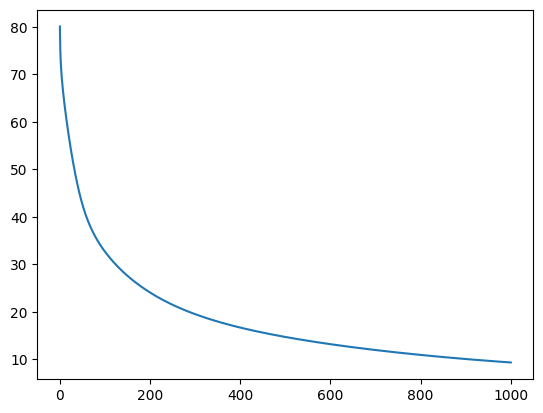

In [21]:
plt.plot(np.mean(self.ds["Ph+"].values, axis = (1, 2)))

(-1.1, -0.4)

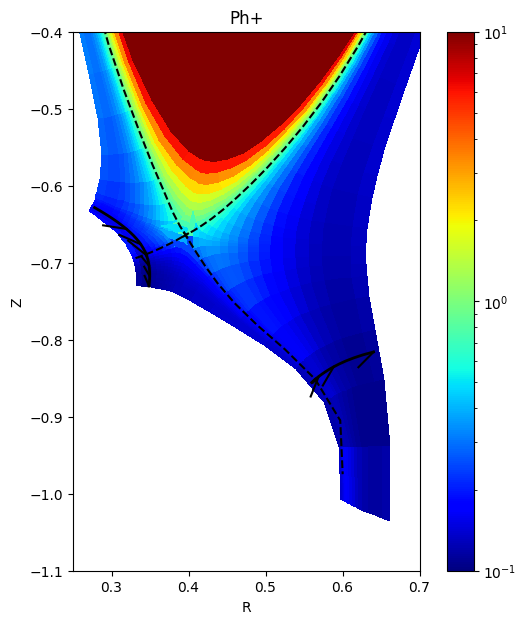

In [9]:
self = a6

fig, ax = plt.subplots(figsize = (7,7))
self.ds["Ph+"].isel(t=-1).bout.pcolormesh(ax = ax, cmap = "jet", 
vmin = 0.1, vmax = 10, 
logscale = True)
ax.set_xlim(0.25, 0.7)
ax.set_ylim(-1.1, -0.4)

In [6]:
self.ds.coords["t"][-1]

<xarray.DataArray 't' ()>
array(100000.)
Coordinates:
    t        float64 1e+05
Attributes:
    metadata:  {'BOUT_VERSION': 5.0, 'iteration': 999, 'zperiod': 1, 'MXSUB':...
    options:   # Tokamak diffusion, parallel conduction, and sheath boundary\...
    regions:   {'lower_inner_PFR': <xbout.region.Region>\n\tname\tlower_inner...
    geometry:  toroidal